In [1]:
import pymysql
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [19]:
_host = '168.131.39.95'
_port = 3306
_user = 'root'
_passwd = 'jslab0963'
_db = 'TYP'
db = pymysql.connect(host=_host, port=_port, user=_user, passwd=_passwd, db=_db, charset= 'utf8')
cursor = db.cursor()
typ_name = ['CHABA2', 'CHANHOM', 'GONI', 'HALOLA', 'HALONG', 'KONGREY2', 'MALAKAS', 'NAKRI2', 'NANGKA', 'NANMADOL', 'NEOGURI',
           'NORU', 'PRAPIROON', 'RUMBIA', 'SOULIK', 'TALIM', 'TRAMI']

In [3]:
#데이터 전처리
typ_feat = []
typ_lang = []

for name in typ_name:
    sql = " SELECT * from " + name
    cursor.execute(sql)
    result = cursor.fetchall()
    for row_data in result:
        typ_lang.append([row_data[1], row_data[2]])
        typ_feat.append([row_data[3], row_data[4], row_data[5]])

#typ_feat : 수온, 풍향, 풍속의 feature들 x_data
print(typ_feat)

#typ_lang : 대한민국 역대 태풍들의 위, 경도 y_data
print(typ_lang)

[[110, Decimal('26.000'), Decimal('29.000')], [115, Decimal('29.000'), Decimal('29.400')], [135, Decimal('29.000'), Decimal('29.400')], [145, Decimal('23.000'), Decimal('29.500')], [145, Decimal('26.000'), Decimal('29.500')], [150, Decimal('27.000'), Decimal('29.500')], [160, Decimal('27.000'), Decimal('29.500')], [175, Decimal('26.000'), Decimal('29.100')], [145, Decimal('30.000'), Decimal('29.500')], [190, Decimal('25.000'), Decimal('28.700')], [165, Decimal('25.000'), Decimal('28.600')], [165, Decimal('27.000'), Decimal('29.000')], [170, Decimal('35.000'), Decimal('29.400')], [170, Decimal('44.000'), Decimal('28.700')], [190, Decimal('56.000'), Decimal('28.900')], [215, Decimal('61.000'), Decimal('28.600')], [210, Decimal('56.000'), Decimal('28.900')], [215, Decimal('57.000'), Decimal('29.200')], [205, Decimal('55.000'), Decimal('29.000')], [205, Decimal('52.000'), Decimal('29.200')], [185, Decimal('50.000'), Decimal('29.100')], [205, Decimal('56.000'), Decimal('29.100')], [200, Dec

In [4]:
#MinMaxScaler으로 feature 값을 0부터 1까지 변환
typ_feat = np.asarray(typ_feat, dtype = np.float32)
scaler = MinMaxScaler(feature_range=(0., 1.))
typ_feat = scaler.fit_transform(typ_feat)
print(len(typ_feat))
print(typ_feat)

typ_lang = np.asarray(typ_lang, dtype = np.float32)
print(len(typ_lang))
print(typ_lang)

#train, value, test 값으로 나누기
x_train = typ_feat[0:260]
x_val = typ_feat[260:520]
x_test = typ_feat[520:784]

y_train = typ_lang[0:260]
y_val = typ_lang[260:520]
y_test = typ_lang[520:784]

735
[[0.2857143  0.13872832 0.8447204 ]
 [0.3        0.15606935 0.8695652 ]
 [0.35714287 0.15606935 0.8695652 ]
 ...
 [0.78571427 0.06358381 0.18633538]
 [0.7        0.19075145 0.2732919 ]
 [0.5142857  0.08092485 0.01863354]]
735
[[ 15.8 158.1]
 [ 15.6 156.4]
 [ 15.2 154.6]
 ...
 [ 37.3 139.6]
 [ 40.9 143.9]
 [ 43.8 148.9]]


In [5]:
print(len(typ_lang))
print(len(typ_feat))

735
735


In [6]:
# 데이터셋 전처리
# list 형태 바꾸기
x_train = np.reshape(x_train, (-1, 3, 1))
x_val = np.reshape(x_val, (-1, 3, 1))
x_test = np.reshape(x_test, (-1, 3, 1))

In [7]:
y_train = np.reshape(y_train, (-1, 2))
y_val = np.reshape(y_train, (-1, 2))
y_test = np.reshape(y_test, (-1, 2))

In [8]:
print(x_train.shape)
print(y_train.shape)

(260, 3, 1)
(260, 2)


In [9]:
# 모델 선언
data_dim = 1
timesteps = 3

# stacked lstm
model = Sequential()
model.add(LSTM(260, input_shape=(3, 1), return_sequences = True, activation = 'relu'))
model.add(LSTM(260, activation = 'relu'))
model.add(Dense(2,activation='relu'))
print(model.summary())


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 260)            272480    
_________________________________________________________________
lstm_2 (LSTM)                (None, 260)               541840    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 522       
Total params: 814,842
Trainable params: 814,842
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=10, validation_data=(x_val, y_val))
#hist = model.fit(x_train,y_train,epochs=300,batch_size=10,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 260 samples, validate on 260 samples
Epoch 1/200
260/260 [==============================] - 3s 13ms/step - loss: 9867.2336 - val_loss: 9602.9084
Epoch 2/200
260/260 [==============================] - 1s 2ms/step - loss: 5567.8754 - val_loss: 1864.3467
Epoch 3/200
260/260 [==============================] - 1s 2ms/step - loss: 802.2613 - val_loss: 636.3932
Epoch 4/200
260/260 [==============================] - 1s 2ms/step - loss: 499.0046 - val_loss: 365.6811
Epoch 5/200
260/260 [==============================] - 1s 2ms/step - loss: 415.7672 - val_loss: 296.4764
Epoch 6/200
260/260 [==============================] - 1s 2ms/step - loss: 368.6001 - val_loss: 258.5387
Epoch 7/200
260/260 [==============================] - 1s 2ms/step - loss: 327.2503 - val_loss: 222.5089
Epoch 8/200
260/260 [==============================] - 1s 2ms/step - loss: 287.3618 - val_loss: 191.2520
Epoch 9/200
260/260 [==============================] - 1s 2ms

260/260 [==============================] - 1s 2ms/step - loss: 53.6450 - val_loss: 185.3413
Epoch 76/200
260/260 [==============================] - 1s 2ms/step - loss: 54.4975 - val_loss: 190.7746
Epoch 77/200
260/260 [==============================] - 1s 2ms/step - loss: 58.6717 - val_loss: 187.5036
Epoch 78/200
260/260 [==============================] - 1s 2ms/step - loss: 61.1277 - val_loss: 179.5928
Epoch 79/200
260/260 [==============================] - 1s 2ms/step - loss: 55.1627 - val_loss: 185.5452
Epoch 80/200
260/260 [==============================] - 1s 2ms/step - loss: 58.2151 - val_loss: 182.0265
Epoch 81/200
260/260 [==============================] - 1s 2ms/step - loss: 58.4802 - val_loss: 185.1139
Epoch 82/200
260/260 [==============================] - 1s 2ms/step - loss: 56.1263 - val_loss: 188.2039
Epoch 83/200
260/260 [==============================] - 1s 2ms/step - loss: 60.0233 - val_loss: 188.4390
Epoch 84/200
260/260 [==============================] - 1s 2ms/step 

260/260 [==============================] - 1s 2ms/step - loss: 63.6537 - val_loss: 187.1942
Epoch 153/200
260/260 [==============================] - 1s 2ms/step - loss: 52.6633 - val_loss: 187.6604
Epoch 154/200
260/260 [==============================] - 1s 2ms/step - loss: 53.6752 - val_loss: 189.3051
Epoch 155/200
260/260 [==============================] - 1s 2ms/step - loss: 60.3060 - val_loss: 184.9320
Epoch 156/200
260/260 [==============================] - 1s 2ms/step - loss: 54.7994 - val_loss: 204.0936
Epoch 157/200
260/260 [==============================] - 1s 2ms/step - loss: 58.5027 - val_loss: 192.2467
Epoch 158/200
260/260 [==============================] - 1s 2ms/step - loss: 63.4373 - val_loss: 190.9869
Epoch 159/200
260/260 [==============================] - 1s 2ms/step - loss: 51.4461 - val_loss: 182.7763
Epoch 160/200
260/260 [==============================] - 1s 2ms/step - loss: 50.4825 - val_loss: 193.8040
Epoch 161/200
260/260 [==============================] - 1s 

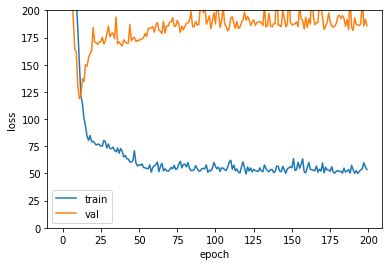

In [11]:
#학습 과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 200.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [12]:
#모델 평가
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  47.61406772320087
Validataion Score:  186.14577355018028
Test Score:  96.03032382698946


In [23]:
chaba_xdata = []
chaba_realdata = []

sql = " SELECT * from VONGFONG"
cursor.execute(sql)
result = cursor.fetchall()
for row_data in result:
    chaba_realdata.append([row_data[1], row_data[2]])
    chaba_xdata.append([row_data[3], row_data[4], row_data[5]])
        
print(len(chaba_realdata))

49


In [24]:
#데이터 전처리
chaba_xdata = np.asarray(chaba_xdata, dtype = np.float32)
scaler = MinMaxScaler(feature_range=(0., 1.))
chaba_xdata = scaler.fit_transform(chaba_xdata)
chaba_xdata = np.reshape(chaba_xdata, (-1, 3, 1))

chaba_realdata = np.reshape(chaba_realdata, (-1, 2))

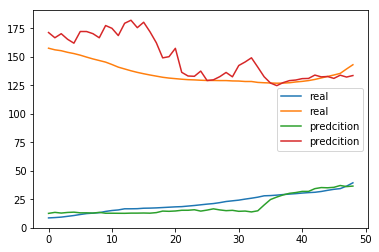

[[ 12.778757 171.4534  ]
 [ 13.664869 166.8828  ]
 [ 13.058    170.4358  ]
 [ 13.59736  165.55263 ]
 [ 13.851097 162.11446 ]
 [ 13.254838 172.36183 ]
 [ 13.26305  172.34239 ]
 [ 13.045693 170.4651  ]
 [ 13.656009 166.86864 ]
 [ 12.91065  177.59558 ]
 [ 12.913766 175.16866 ]
 [ 12.870746 168.79597 ]
 [ 12.841013 179.57506 ]
 [ 12.999253 182.2426  ]
 [ 13.003702 175.72377 ]
 [ 13.095785 180.48558 ]
 [ 12.967502 172.10109 ]
 [ 13.454733 162.45271 ]
 [ 14.789335 149.23836 ]
 [ 14.58826  150.26746 ]
 [ 14.873944 157.59982 ]
 [ 15.498521 136.56075 ]
 [ 15.511981 133.31456 ]
 [ 15.964494 133.06517 ]
 [ 14.772789 137.62357 ]
 [ 15.665991 129.34746 ]
 [ 16.767344 129.96925 ]
 [ 15.828413 132.7212  ]
 [ 15.164458 136.43376 ]
 [ 15.459134 132.609   ]
 [ 14.587796 142.53474 ]
 [ 14.812287 145.61562 ]
 [ 14.058159 149.28064 ]
 [ 15.04471  141.08218 ]
 [ 20.138968 132.65901 ]
 [ 24.925552 127.148865]
 [ 27.112015 124.870056]
 [ 28.981993 127.51599 ]
 [ 30.391596 129.27893 ]
 [ 31.064856 129.80208 ]


In [25]:
yhat = model.predict(chaba_xdata, verbose = 0)

plt.plot(chaba_realdata, label = "real")
plt.plot(yhat,label="predcition")
plt.legend()
plt.show()
print(yhat)
print(chaba_realdata)

In [16]:
db.close()

In [17]:
print(yhat.shape)
print(chaba_realdata.shape)

(833, 2)
(833, 2)
